# Credit Card Fraud Detection

This notebook will be where I demonstrate my abilities to detect credit card fraud using a Kaggle dataset while I'm eating a chicken pot pie. Well, the pie is done, so I guess I'm halfway finished.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [2]:
df=pd.read_csv('D:/cc_data/creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [5]:
class_names = {0:'Not Fraud', 1:'Fraud'}
print(df.Class.value_counts().rename(index = class_names))

Not Fraud    284315
Fraud           492
Name: Class, dtype: int64


So a LOT of these are not fraud. Which makes sense, since most folks are pretty honest. But this will probably skew the models since if it guesses not fraud, it'll be right more often than not.

In [6]:
df.Class.value_counts(normalize=True)

0    0.998273
1    0.001727
Name: Class, dtype: float64

Yeah. 99.8% of the time, if it guesses 'not fraud' it'll be right. So we need to make sure we account for that.

In [7]:
df1=df.drop(columns='Class')
features = df1.columns
print(features)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [8]:
target=df['Class'].to_frame().columns
print(target)

Index(['Class'], dtype='object')


In [9]:
data_features = df[features]
data_target = df['Class']

In [10]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, train_size=0.70, test_size=0.30, random_state=1)
print("Length of X_train is: {X_train}".format(X_train = len(X_train)))
print("Length of X_test is: {X_test}".format(X_test = len(X_test)))
print("Length of y_train is: {y_train}".format(y_train = len(y_train)))
print("Length of y_test is: {y_test}".format(y_test = len(y_test)))

Length of X_train is: 199364
Length of X_test is: 85443
Length of y_train is: 199364
Length of y_test is: 85443


So let's first try with a simple logistic regression. I don't know why, since it most assuredly won't work.

In [11]:
model = LogisticRegression()
model.fit(X_train, y_train.values.ravel())

D:\anaconda3\envs\learn-env\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [12]:
pred = model.predict(X_test)

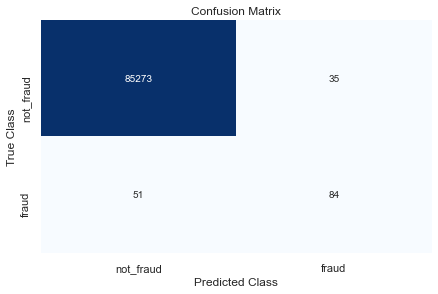

In [13]:
class_names = ['not_fraud', 'fraud']
matrix = confusion_matrix(y_test, pred)
# Create pandas dataframe
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [14]:
from sklearn.metrics import f1_score, recall_score
f1_score = round(f1_score(y_test, pred), 2)
recall_score = round(recall_score(y_test, pred), 2)
print("Sensitivity/Recall for Logistic Regression Model 1 : {recall_score}".format(recall_score = recall_score))
print("F1 Score for Logistic Regression Model 1 : {f1_score}".format(f1_score = f1_score))

Sensitivity/Recall for Logistic Regression Model 1 : 0.62
F1 Score for Logistic Regression Model 1 : 0.66


In [24]:
print('Accuracy: ', accuracy_score(y_test,pred))

Accuracy:  0.9989934810341398


## Decision Trees

You know, I wasn't very pleased with the simple logistic regression, so I thought I'd try out Decision Trees

In [15]:
clf=DecisionTreeClassifier(criterion='entropy')

In [16]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

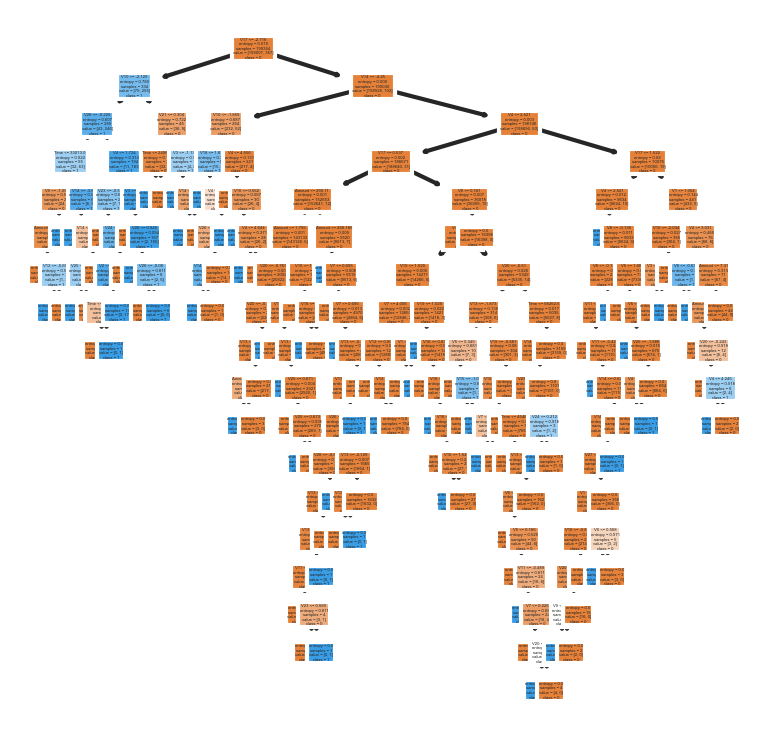

In [17]:
fig, axes = plt.subplots(nrows = 1,ncols = 1, figsize = (3,3), dpi=300)
tree.plot_tree(clf,
               feature_names = df.columns, 
               class_names=np.unique(data_target).astype('str'),
               filled = True)
plt.show()

In [18]:
tree_preds = clf.predict(X_test)

In [21]:
print('Accuracy: ', accuracy_score(y_test, tree_preds))

Accuracy:  0.9991807403766253


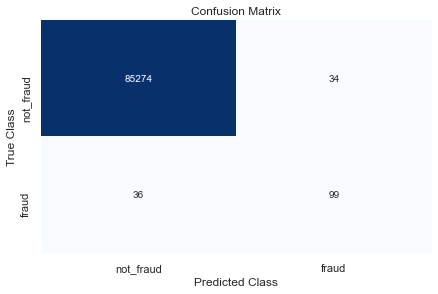

In [23]:
matrix2 = confusion_matrix(y_test, tree_preds)
df2 = pd.DataFrame(matrix2, index=class_names, columns=class_names)
sns.heatmap(df2, annot=True, cbar=None, cmap="Blues", fmt = 'g')
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [26]:
clf.feature_importances_

array([0.01730382, 0.0081954 , 0.00175623, 0.00621065, 0.03292986,
       0.00750018, 0.00419633, 0.00983827, 0.00888921, 0.00275548,
       0.04709245, 0.00590316, 0.00472987, 0.02066254, 0.1209698 ,
       0.00285792, 0.01425417, 0.60661713, 0.00645037, 0.00612115,
       0.01240561, 0.00397694, 0.        , 0.00541485, 0.00223307,
       0.00648686, 0.01528768, 0.00147671, 0.00242431, 0.01505999])

In [32]:
feat_imp=pd.DataFrame({'col_name': clf.feature_importances_}, index=features).sort_values(by='col_name', ascending=False)

In [33]:
feat_imp

,col_name
V17,0.606617
V14,0.120970
V10,0.047092
V4,0.032930
V13,0.020663
Time,0.017304
V26,0.015288
Amount,0.015060
V16,0.014254
V20,0.012406
